In [1]:
from random import Random
from rtree.index import Index
from typing import List
from matplotlib import pyplot
from timeit import timeit

r = Random()
index = Index()
points = []

rectside = 0.0001


def unindexed_n(n_first: int, result: List[int]):
    result.clear()
    for i in range(n_first):
        x_i, y_i = points[i]
        for j in range(len(points)):
            x_j, y_j = points[j]
            if abs(x_i - x_j) <= 2 * rectside and abs(y_i - y_j) <= 2 * rectside:
                result.append(j)


def indexed_n(n_first: int, result: List[int]):
    result.clear()
    for i in range(n_first):
        x_i, y_i = points[i]
        js = index.intersection((x_i - rectside, y_i - rectside, x_i + rectside, y_i + rectside))
        for j in js:
            result.append(j)




In [2]:
time_u = []
time_i = []
cycles = 50

index = Index()
points = [] # для перезапуска

for f in range(cycles):
    new_points = [
        (r.random(), r.random()) for _ in range(200)
    ]

    for i, (x, y) in enumerate(new_points):
        index.add(i, (x - rectside, y - rectside, x + rectside, y + rectside))
    print(f,end=' ')
    points += new_points
    time_u.append(timeit(lambda: unindexed_n(10, []), number=100) / 100)
    time_i.append(timeit(lambda: indexed_n(10, []), number=100) / 100)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

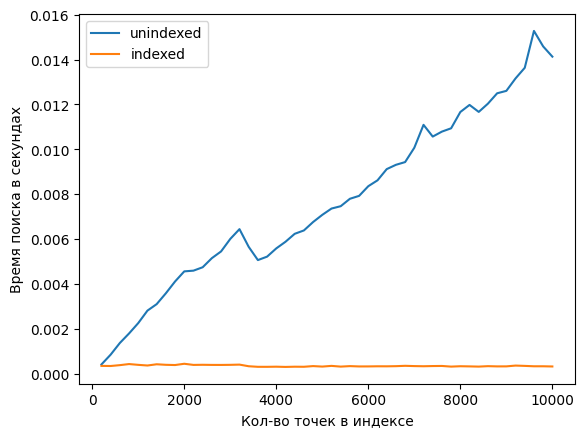

In [3]:
pyplot.plot([i*200 for i in range(1, cycles+1)], time_u, label="unindexed")
pyplot.plot([i*200 for i in range(1, cycles+1)], time_i, label='indexed')
pyplot.ylabel("Время поиска в секундах")
pyplot.xlabel("Кол-во точек в индексе")
pyplot.legend()

Проверка что функции работают правильно и дают одинаковый результат

In [4]:
u_res = []
i_res = []
unindexed_n(10, u_res)
indexed_n(10, i_res)
u_res.sort()
i_res.sort()
print(u_res == i_res)

True


Только rtree

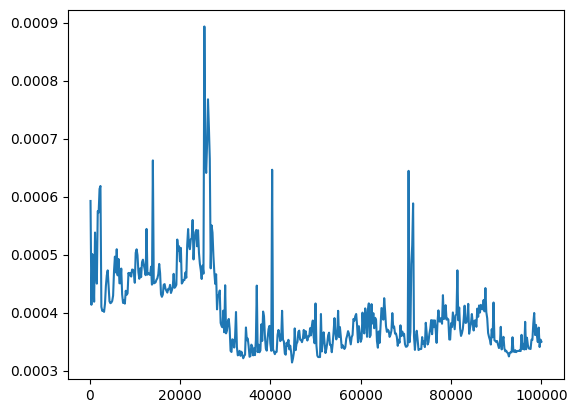

In [7]:
time_i = []
cycles = 500

points = []
index = Index()


for f in range(cycles):
    new_points = [
        (r.random(), r.random()) for _ in range(200)
    ]

    for i, (x, y) in enumerate(new_points):
        index.add(i, (x - rectside, y - rectside, x + rectside, y + rectside))
    #print(f)
    points += new_points
    time_i.append(timeit(lambda: indexed_n(10, []), number=100) / 100)

pyplot.plot([i * 200 for i in range(1,cycles+1)], time_i)



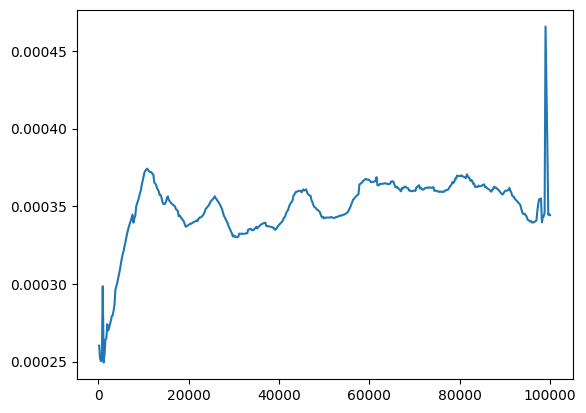

In [6]:
time_smooth = time_i[:10]
for i in range(10, cycles - 10):
    time_smooth.append(sum(time_i[i-10:i+10]) / 20)
time_smooth += time_i[-10:]
pyplot.plot([i * 200 for i in range(1,cycles+1)], time_smooth)
